# Title

## Introduction

**Question**: How do age and experience level predict the number of hours played?

## Methods & Results

In [2]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# Read players.csv
players <- read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")
players

# Read sessions.csv
sessions <- read_csv("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")
sessions

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


To answer our quesiton of How does age and experience level predict the number of hours played?, we are going to select the variables experience, played hours, and age to create our new data set. 


In [4]:
players_select <- players |>
    select(played_hours, age, experience)

players_select

played_hours,age,experience
<dbl>,<dbl>,<chr>
30.3,9,Pro
3.8,17,Veteran
0.0,17,Veteran
⋮,⋮,⋮
0.0,17,Amateur
2.3,17,Amateur
0.2,91,Pro


Now we're going to plot Age and Experience with respect to played_hours to get a general idea of our plot and to see which prediction method to use. 

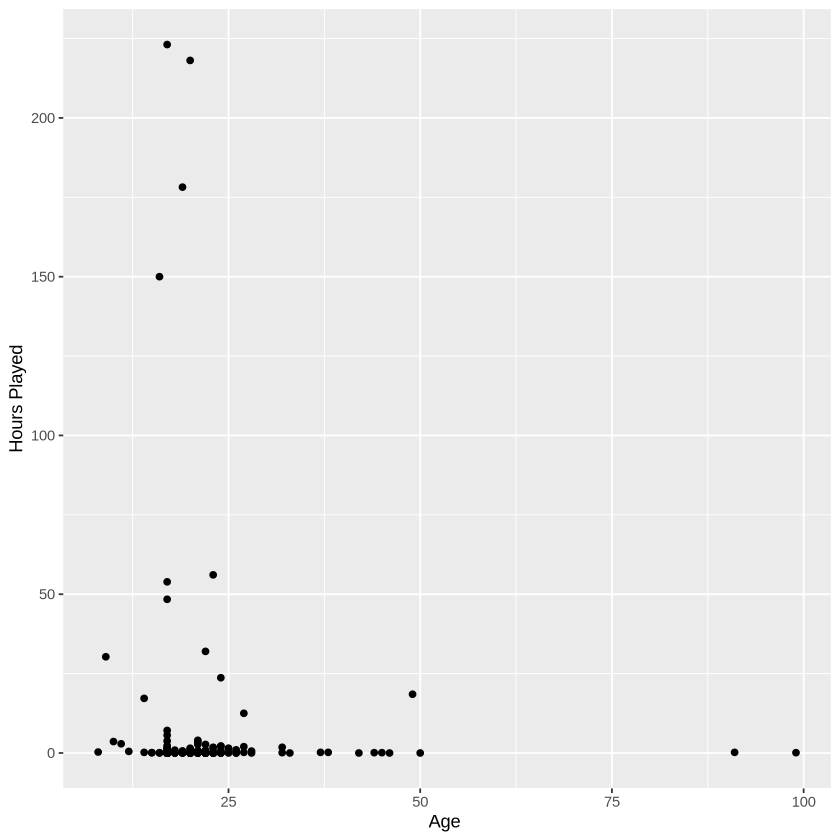

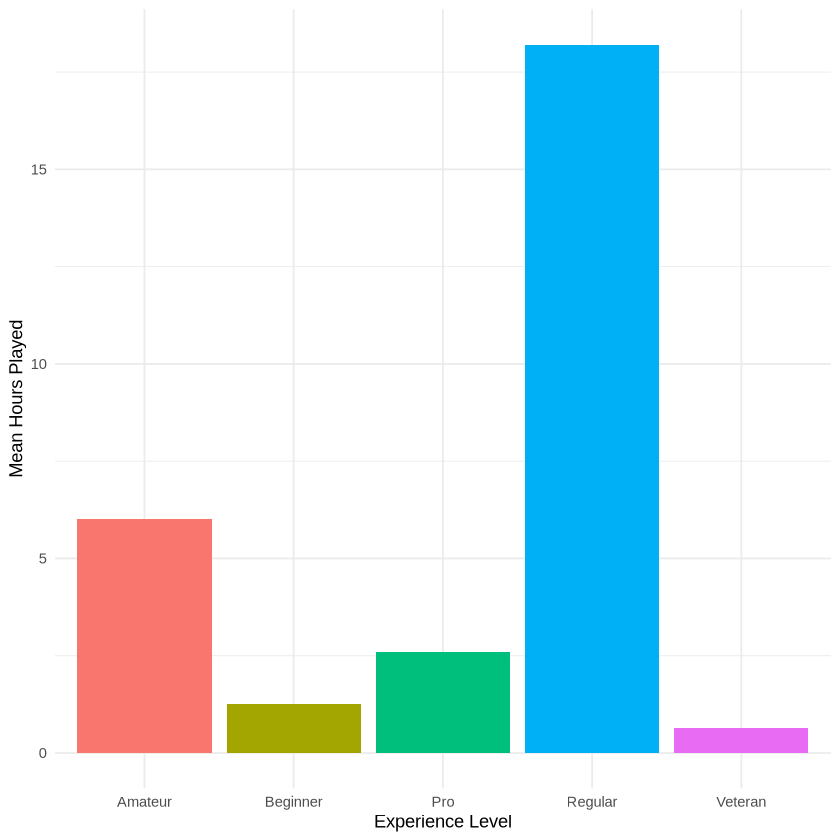

In [5]:
# Age Plot

age_plot <- players_select |>
    ggplot(aes(x = age, y = played_hours)) +
    geom_point() +
    labs(x = "Age ", y = "Hours Played")

age_plot  

# Experience Plot

experience_plot <- players_select |>
    ggplot(aes(x = experience, y = played_hours, fill = experience)) +
    geom_bar(stat = "summary", fun = "mean", position = "dodge") +
    labs(x = "Experience Level", y = "Mean Hours Played", color = "Color") +
    theme_minimal() +
    theme(legend.position = "none") 

experience_plot



    

We notice that there is no distinct linear relationship within the two graphs. Therefore, we conclude that KNN regression be the best predictive model to use in predicting hours played from the predictive variables "experience" and "age".

To create a KNN predictive model, we must first wrangle the experience variable to be numerical.

In [9]:
players_new <- mutate(players_select, experience_num = as.numeric(as.factor(experience)))
players_new

played_hours,age,experience,experience_num
<dbl>,<dbl>,<chr>,<dbl>
30.3,9,Pro,3
3.8,17,Veteran,5
0.0,17,Veteran,5
⋮,⋮,⋮,⋮
0.0,17,Amateur,1
2.3,17,Amateur,1
0.2,91,Pro,3


After converting the experience into numberical values we can start building up our knn-regression model. First step is going to be creating our training and testing data.


In [10]:
#initial split
players_split <- initial_split(players_new, prop = .75, strata = played_hours)

# Training data
players_training <- training(players_split)
#Testing Data
players_testing <- testing(players_split)

players_training
players_testing

played_hours,age,experience,experience_num
<dbl>,<dbl>,<chr>,<dbl>
0.1,21,Regular,4
0.0,17,Amateur,1
0.0,19,Regular,4
⋮,⋮,⋮,⋮
32.0,22,Amateur,1
1.7,17,Pro,3
2.3,17,Amateur,1


played_hours,age,experience,experience_num
<dbl>,<dbl>,<chr>,<dbl>
0.0,17,Veteran,5
0.7,21,Amateur,1
0.0,22,Veteran,5
⋮,⋮,⋮,⋮
0.1,18,Regular,4
0.1,44,Veteran,5
0.0,17,Amateur,1


## Discussion

## References